# Заданиe: Для набора Breast Cancer применить t-SNE и потом измерить точность

Import the libraries we're going work with

In [7]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

Load the Breast Cancer dataset

In [4]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()

Scale the dataset

In [5]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

After executing this code to scale the data, we can then proceed with the t-SNE code as follows:

In [8]:
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.5 MB/s eta 0:00:00




Apply t-SNE to the Breast Cancer dataset

In [9]:
# Apply t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

Plot the transformed data points in a scatter plot, coloring them by class labels '(cancer.target)'.

Text(0, 0.5, 't-SNE component 2')

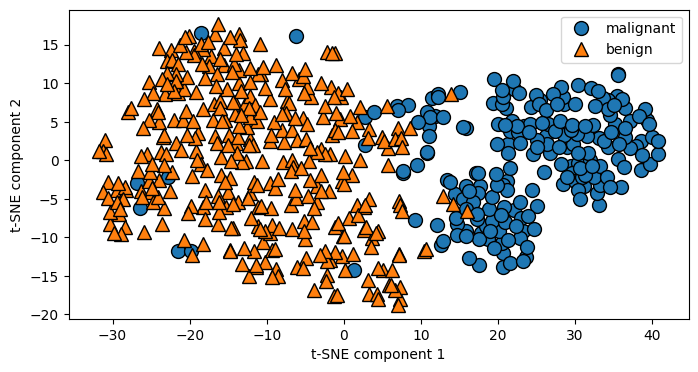

In [10]:
# Visualize t-SNE representation
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")

Measure the accuracy of the t-SNE representation:
- After visualizing the data in the t-SNE space, if the classes are well-separated, we can visually inspect the plot and estimate the accuracy.
- If we have labeled data, we can quantitatively measure the accuracy by training a classifier (e.g., logistic regression, support vector machine) on the t-SNE-transformed data and evaluating its performance using cross-validation.

In [11]:
# Measure accuracy using t-SNE representation
X_train, X_test, y_train, y_test = train_test_split(X_tsne, cancer.target, random_state=42)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using t-SNE representation: {:.2f}".format(accuracy))

Accuracy using t-SNE representation: 0.96
